In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as SKPCA

In [3]:
# Ajuste o caminho de arquivo conforme seu dataset
df = pd.read_csv('data/tripadvisor_european_restaurants.csv')

# Selecionar automaticamente apenas colunas numéricas de interesse
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Colunas numéricas detectadas:", numeric_cols)

# Se preferir, você pode especificar manualmente:
# numeric_cols = ['avg_rating','open_days_per_week','open_hours_per_week','price_level']

# Remover linhas incompletas nessas colunas
df_num = df[numeric_cols].dropna()
X = df_num.values
print("Forma X:", X.shape)

# --- 2) Padronizar os dados (muito importante antes do PCA) ---------------
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_17620\35048509.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/tripadvisor_european_restaurants.csv')


Colunas numéricas detectadas: ['latitude', 'longitude', 'open_days_per_week', 'open_hours_per_week', 'working_shifts_per_week', 'avg_rating', 'total_reviews_count', 'reviews_count_in_default_language', 'excellent', 'very_good', 'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere']
Forma X: (199542, 17)


In [4]:
# --- 3) PCA via NumPy (passos conforme aula) ------------------------------
# (a) matriz de covariância
cov = np.cov(X_std.T)                   # covariância das features
# (b) autovalores e autovetores
eig_vals, eig_vecs = np.linalg.eig(cov)
# (c) ordenar por autovalores decrescentes
idx = np.argsort(eig_vals)[::-1]
eig_vals_ord = eig_vals[idx]
eig_vecs_ord = eig_vecs[:, idx]
# (d) escolher k componentes, aqui 2 para visualização
k = 2
components = eig_vecs_ord[:, :k]
# (e) projetar os dados
proj_numpy = X_std.dot(components)

# Variância explicada
explained_var_ratio_numpy = eig_vals_ord / eig_vals_ord.sum()
print("Variância explicada (autovalores ordenados):", explained_var_ratio_numpy[:k])


Variância explicada (autovalores ordenados): [0.33014265 0.24617617]


In [5]:
# --- 4) PCA via scikit-learn (para comparação / validação) ----------------
skpca = SKPCA(n_components=2)
proj_sklearn = skpca.fit_transform(X_std)
print("Sklearn explained variance ratio:", skpca.explained_variance_ratio_)

Sklearn explained variance ratio: [0.33014265 0.24617617]


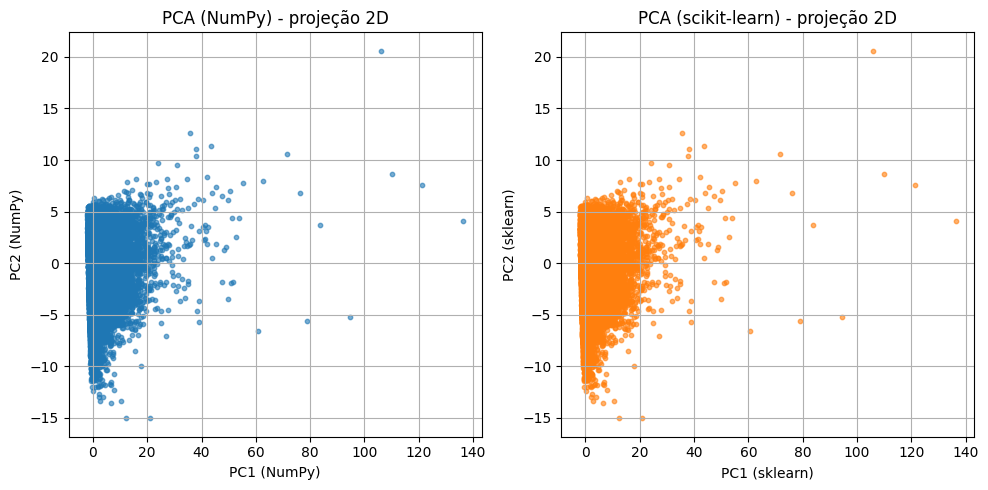

In [6]:
# --- 5) Visualização 2D ---------------------------------------------------
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(proj_numpy[:,0], proj_numpy[:,1], s=10, alpha=0.6)
plt.title("PCA (NumPy) - projeção 2D")
plt.xlabel("PC1 (NumPy)")
plt.ylabel("PC2 (NumPy)")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(proj_sklearn[:,0], proj_sklearn[:,1], s=10, alpha=0.6, c='tab:orange')
plt.title("PCA (scikit-learn) - projeção 2D")
plt.xlabel("PC1 (sklearn)")
plt.ylabel("PC2 (sklearn)")
plt.grid(True)

plt.tight_layout()
plt.show()